In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/millas-por-galon.csv')

# Exploración

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cylinders     399 non-null    object
 1   displacement  399 non-null    object
 2   horsepower    393 non-null    object
 3   weight        399 non-null    object
 4   acceleration  399 non-null    object
 5   model year    399 non-null    object
 6   origin        399 non-null    object
 7   mpg           400 non-null    object
 8   car name      400 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


# Transformar los tipos de datos a lo que corresponden

In [6]:
# Convertir columnas relevantes a numéricas y manejar valores faltantes
columns_to_convert = ['horsepower', 'weight', 'acceleration', 'mpg']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Eliminar filas con valores faltantes en las columnas de interés
df_cleaned = df.dropna(subset=columns_to_convert)

# Verificar la limpieza
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 2 to 399
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    object 
 1   displacement  392 non-null    object 
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    float64
 4   acceleration  392 non-null    float64
 5   model year    392 non-null    object 
 6   origin        392 non-null    object 
 7   mpg           392 non-null    float64
 8   car name      392 non-null    object 
dtypes: float64(4), object(5)
memory usage: 30.6+ KB


# Visualización de la dispersión de las variables en relación a MPG(Miles per gallon)

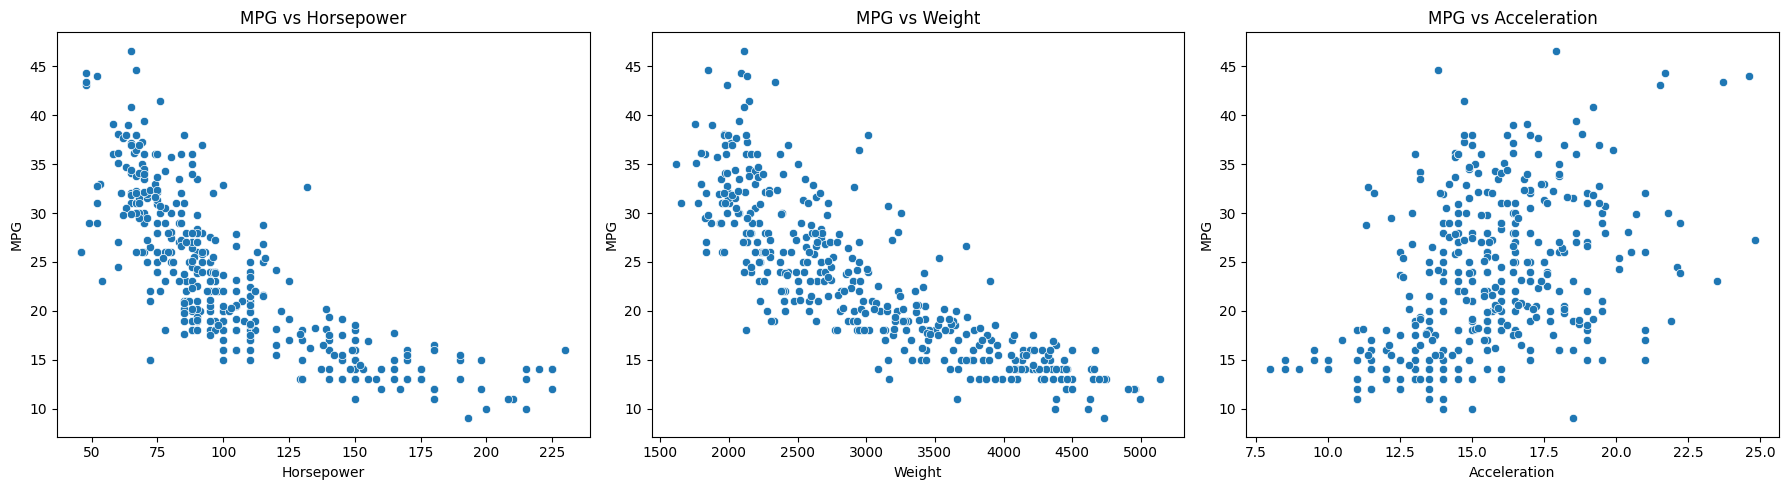

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráficos de dispersión
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x='horsepower', y='mpg', data=df_cleaned, ax=axs[0])
axs[0].set_title('MPG vs Horsepower')
axs[0].set_xlabel('Horsepower')
axs[0].set_ylabel('MPG')

sns.scatterplot(x='weight', y='mpg', data=df_cleaned, ax=axs[1])
axs[1].set_title('MPG vs Weight')
axs[1].set_xlabel('Weight')
axs[1].set_ylabel('MPG')

sns.scatterplot(x='acceleration', y='mpg', data=df_cleaned, ax=axs[2])
axs[2].set_title('MPG vs Acceleration')
axs[2].set_xlabel('Acceleration')
axs[2].set_ylabel('MPG')

plt.tight_layout()
plt.show()


## Que se puede inferir

MPG vs Horsepower:

Hay una relación negativa aparente entre la potencia del motor (horsepower) y el rendimiento de combustible (mpg). A medida que la potencia del motor aumenta, el mpg tiende a disminuir. Esta relación parece ser lineal.

MPG vs Weight:

Similarmente, hay una relación negativa aparente entre el peso del vehículo (weight) y el rendimiento de combustible (mpg). A medida que el peso aumenta, el mpg tiende a disminuir. Esta relación también parece ser lineal.

MPG vs Acceleration:

La relación entre la aceleración (acceleration) y el rendimiento de combustible (mpg) no parece ser tan clara. Hay una dispersión considerable y no parece haber una tendencia lineal evidente.

# Iniciamos un modelo de regresión entre caballos de fuerza y mpg

In [8]:
import statsmodels.api as sm

# Definir variables
X_hp = df_cleaned['horsepower']
y = df_cleaned['mpg']

# Añadir constante
X_hp = sm.add_constant(X_hp)

# Ajustar modelo
model_hp = sm.OLS(y, X_hp).fit()

# Resumen del modelo
print(model_hp.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           7.03e-81
Time:                        20:32:52   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

# Visualizamos el modelo

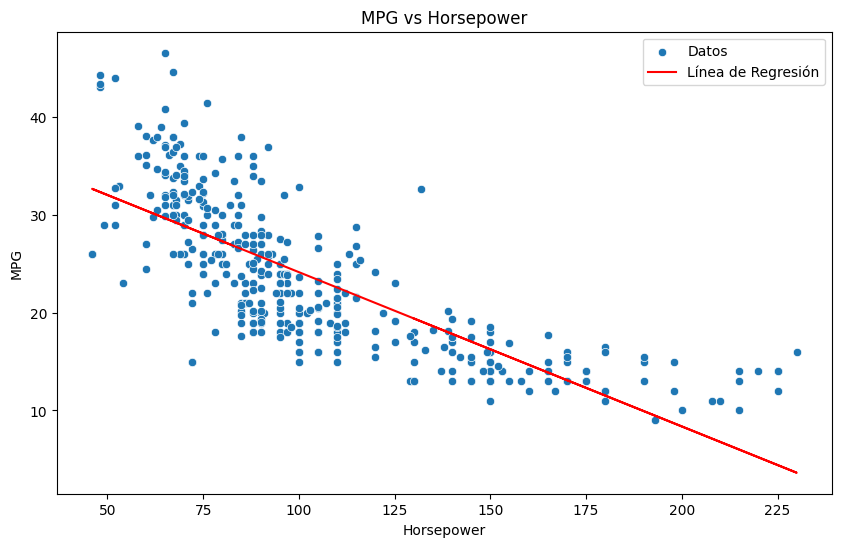

In [9]:
# Visualización del modelo de regresión
plt.figure(figsize=(10, 6))

# Gráfico de dispersión de los datos
sns.scatterplot(x='horsepower', y='mpg', data=df_cleaned, label='Datos')

# Línea de regresión
plt.plot(df_cleaned['horsepower'], model_hp.predict(X_hp), color='red', label='Línea de Regresión')

plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()


# Repetimos con Weight y mpg

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          6.02e-102
Time:                        20:41:55   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.0

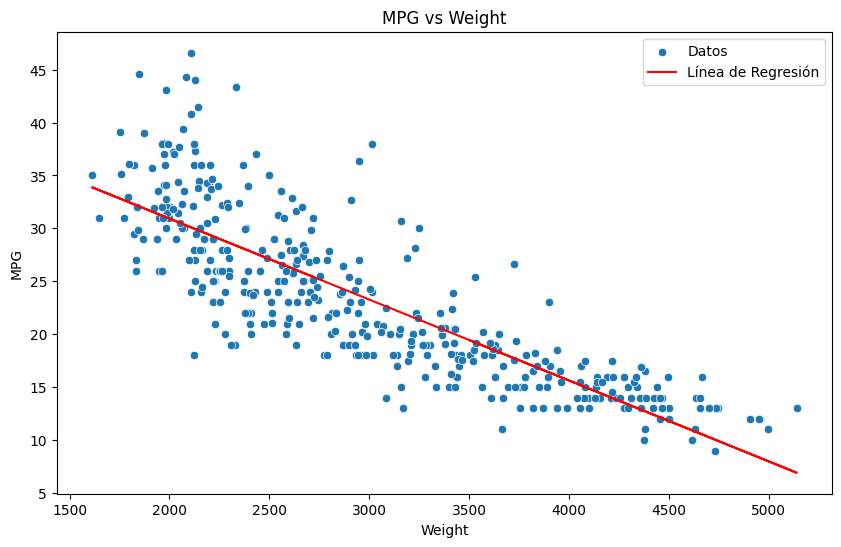

In [11]:
# Modelo regresivo simple para weight
# Definir variables
X_weight = df_cleaned['weight']
y = df_cleaned['mpg']

# Añadir constante
X_weight = sm.add_constant(X_weight)

# Ajustar modelo
model_weight = sm.OLS(y, X_weight).fit()

# Resumen del modelo
print(model_weight.summary())

# Visualización del modelo de regresión para weight
plt.figure(figsize=(10, 6))

# Gráfico de dispersión de los datos
sns.scatterplot(x='weight', y='mpg', data=df_cleaned, label='Datos')

# Línea de regresión
plt.plot(df_cleaned['weight'], model_weight.predict(X_weight), color='red', label='Línea de Regresión')

plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend()
plt.show()



# Repetimos con acceleration y mpg

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     85.15
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.78e-18
Time:                        20:42:05   Log-Likelihood:                -1322.5
No. Observations:                 392   AIC:                             2649.
Df Residuals:                     390   BIC:                             2657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.8332      2.048      2.359   

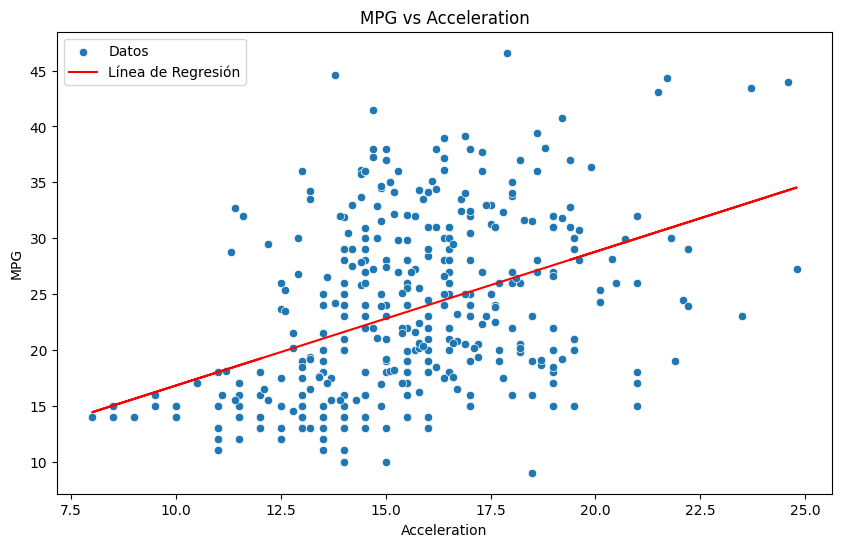

In [12]:
# Modelo regresivo simple para acceleration
# Definir variables
X_acceleration = df_cleaned['acceleration']
y = df_cleaned['mpg']

# Añadir constante
X_acceleration = sm.add_constant(X_acceleration)

# Ajustar modelo
model_acceleration = sm.OLS(y, X_acceleration).fit()

# Resumen del modelo
print(model_acceleration.summary())

# Visualización del modelo de regresión para acceleration
plt.figure(figsize=(10, 6))

# Gráfico de dispersión de los datos
sns.scatterplot(x='acceleration', y='mpg', data=df_cleaned, label='Datos')

# Línea de regresión
plt.plot(df_cleaned['acceleration'], model_acceleration.predict(X_acceleration), color='red', label='Línea de Regresión')

plt.title('MPG vs Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.legend()
plt.show()


# Haremos resumen de estadísticas y resultados de los modelos

In [13]:
# Resumen del modelo de weight
model_weight.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          6.02e-102
Time:                        20:43:07   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Resumen del modelo de acceleration
model_acceleration.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     85.15
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           1.78e-18
Time:                        20:44:13   Log-Likelihood:                -1322.5
No. Observations:                 392   AIC:                             2649.
Df Residuals:                     390   BIC:                             2657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.8332      2.048      2.359      0.019       0.806       8.861
acceleration     1.1976      0.130      9.228      0.000       0.942       1.453
==============================================================================
Omnibus:                       16.649   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.415
Skew:                           0.492   Prob(JB):                     0.000165
Kurtosis:                       2.684   Cond. No.                         90.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           7.03e-81
Time:                        20:47:31   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comparación de los Modelos**

**Coeficiente de Determinación (R-squared):**

Horsepower: 0.606
Weight: 0.693
Acceleration: 0.179

**Pendientes:**

Horsepower: -0.1578
Weight: -0.0076
Acceleration: 1.1976

**Prob (F-statistic):**

Horsepower: 7.03e-81
Weight: 6.02e-102
Acceleration: 1.78e-18

**AIC (Akaike Information Criterion):**

Horsepower: 2361
Weight: 2264
Acceleration: 2649
Interpretaciones


**Interpretación**

Weight tiene el coeficiente de determinación más alto (0.693), lo que significa que el modelo de weight explica mejor la variabilidad en mpg en comparación con horsepower (0.606) y acceleration (0.179).
Pendientes:

Tanto horsepower como weight tienen pendientes negativas, lo que indica que a medida que estas variables aumentan, mpg disminuye. Acceleration tiene una pendiente positiva, lo que sugiere que a mayor aceleración, mpg aumenta.
Prob (F-statistic):

Todos los modelos tienen valores de Prob (F-statistic) muy bajos, lo que indica que los modelos son significativos.

**AIC:**

Weight tiene el menor valor de AIC (2264), lo que indica que este modelo tiene un mejor ajuste relativo cuando se considera la penalización por el número de parámetros en el modelo.

**Conclusión**

De los tres modelos simples, weight parece tener la mayor incidencia en el rendimiento del motor (mpg), ya que tiene el coeficiente de determinación más alto y el menor AIC, lo que sugiere que este modelo explica mejor la variabilidad en mpg y se ajusta mejor a los datos.

# Veremos los residuales para los 3 modelos:

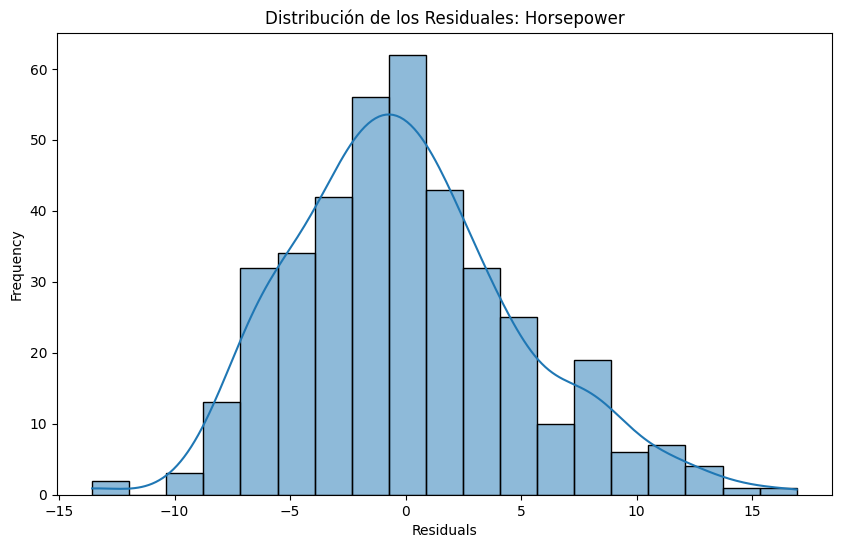

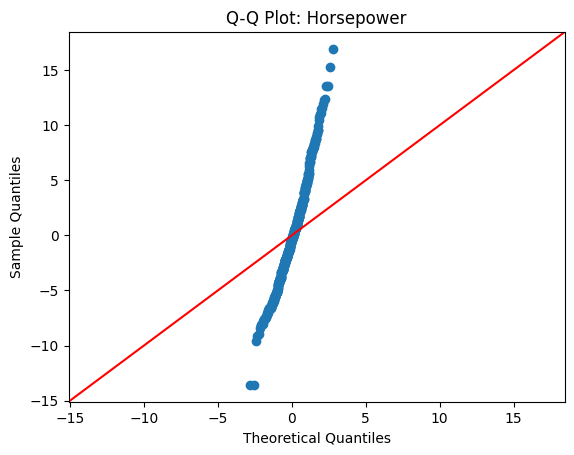

In [18]:
# Análisis de residuales para horsepower
residuals_hp = model_hp.resid

# Histograma de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals_hp, kde=True)
plt.title('Distribución de los Residuales: Horsepower')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Gráfico Q-Q
sm.qqplot(residuals_hp, line='45')
plt.title('Q-Q Plot: Horsepower')
plt.show()


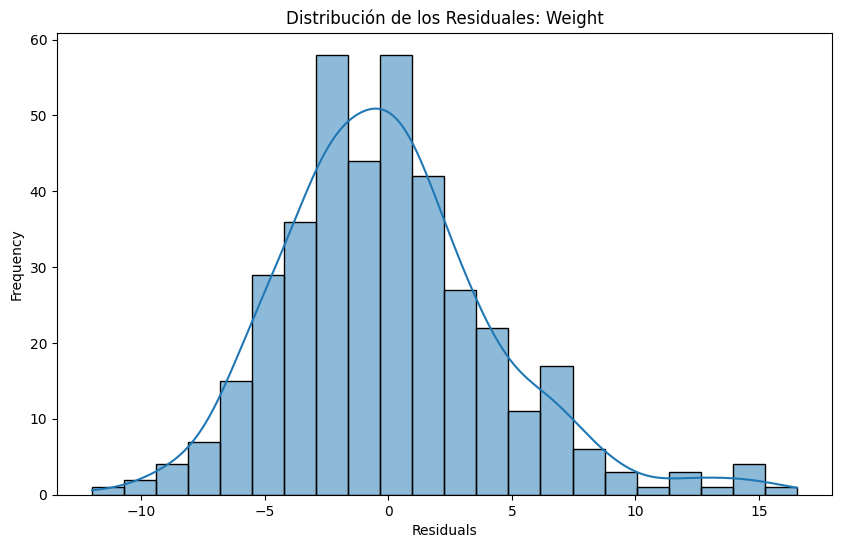

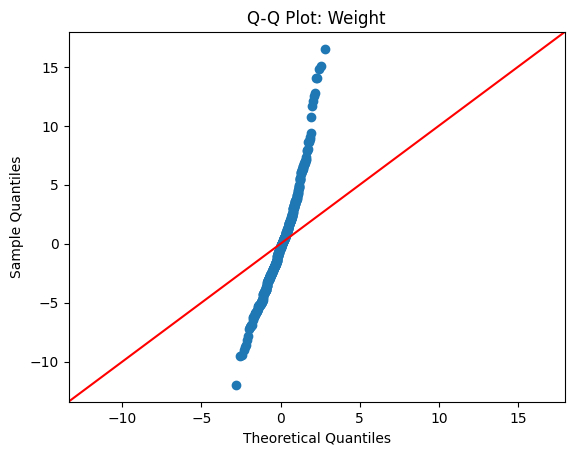

In [19]:
# Análisis de residuales para weight
residuals_weight = model_weight.resid

# Histograma de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals_weight, kde=True)
plt.title('Distribución de los Residuales: Weight')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Gráfico Q-Q
sm.qqplot(residuals_weight, line='45')
plt.title('Q-Q Plot: Weight')
plt.show()


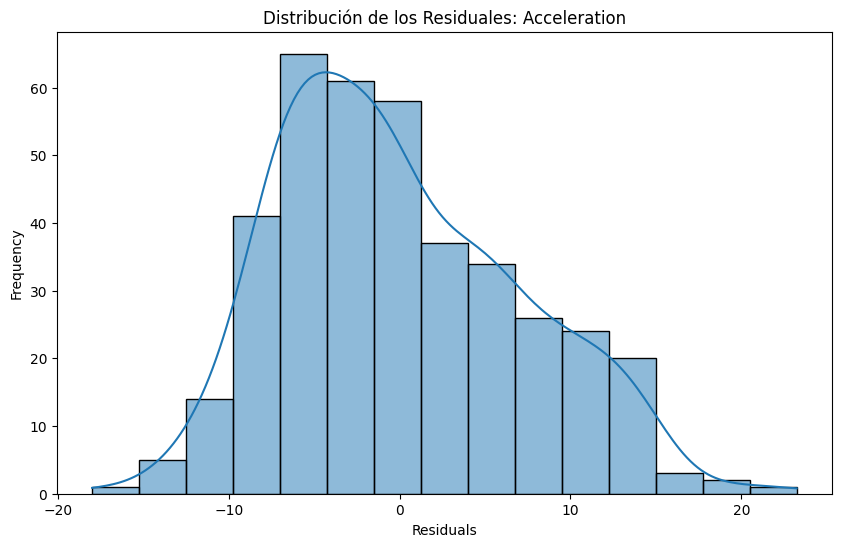

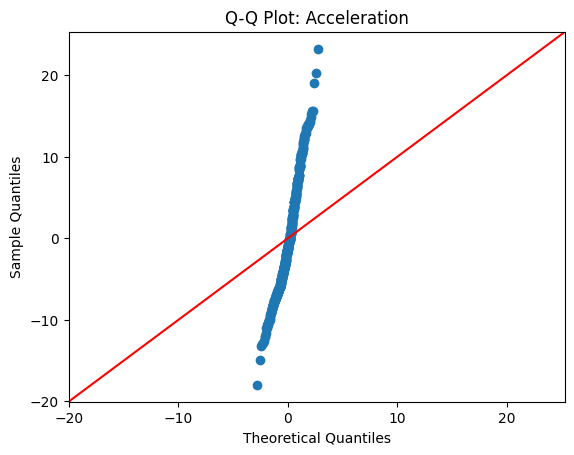

In [20]:
# Análisis de residuales para acceleration
residuals_acceleration = model_acceleration.resid

# Histograma de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals_acceleration, kde=True)
plt.title('Distribución de los Residuales: Acceleration')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Gráfico Q-Q
sm.qqplot(residuals_acceleration, line='45')
plt.title('Q-Q Plot: Acceleration')
plt.show()


**Histograma de los Residuales:**

Este ultimo histograma muestra que los residuales están distribuidos aproximadamente de manera normal, pero hay una ligera asimetría hacia la derecha, similar a lo observado en horsepower y weight.

**Gráfico Q-Q:**

El Q-Q plot muestra que los residuales no siguen perfectamente la línea de referencia de una distribución normal. Hay desviaciones significativas en los extremos, lo que sugiere la presencia de valores atípicos, similar a los otros dos modelos.

Retiro nuevamente que de los tres modelos, weight parece tener la mayor incidencia en el rendimiento del motor (mpg), ya que tiene el coeficiente de determinación más alto, lo que indica que explica mejor la variabilidad en mpg. Además, el menor valor de AIC para weight indica un mejor ajuste relativo del modelo.

